In [ ]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [ ]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [ ]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
%matplotlib inline

In [ ]:
%store -r X_com_sim
%store -r Y_com_sim
print(X_com_sim.shape)
print(Y_com_sim.shape)

# Multivariate Linear Regression (CoM Prediction)

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Predict CoM (x) movement

In [ ]:
X_com_sim[0, :]

In [ ]:
Y_com_sim[0, :]

### Linear Regression

In [ ]:
def find_best_model(X, Y, runs=1000):
    best_model = None
    lowest_error = 100
    best_Xtr, best_Xte, best_Ytr, best_Yte = None, None, None, None
    
    for _ in range(runs):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, shuffle=True)
        
        model = LinearRegression()
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)
        error = np.max(np.abs(predictions - Y_test))

        if error < lowest_error:
            best_model = model
            lowest_error = error
            best_Xtr, best_Xte, best_Ytr, best_Yte = X_train, X_test, Y_train, Y_test

    # Stats
    predictions = best_model.predict(best_Xte)
    print('R2: ', r2_score(predictions, best_Yte))
    print('RMSE: ', np.sqrt(mean_squared_error(best_Yte, predictions)))
    print("The lowest error is: ", np.min(np.abs(predictions - best_Yte)))
    print("The highest error is: ", np.max(np.abs(predictions - best_Yte)))
    print("The avg. error is: ", np.mean(np.abs(predictions - best_Yte)))
    
    return best_Xte, best_Yte, predictions, best_model

In [10]:
# Input
X = np.hstack((X_com_sim[:, 0:1], # current reference velocity
               X_com_sim[:, 3:4], # actual velocity
               X_com_sim[:, 6:8], # FL position
               X_com_sim[:, 9:11], # FR position
               X_com_sim[:, 12:14], # RL position
               X_com_sim[:, 15:17])) # RR position

# Labels
Y = np.array([Y_com_sim[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fr_com_x = find_best_model(X, Y, runs=5000)

R2:  0.9766916097431257
RMSE:  0.012284494986901706
The lowest error is:  3.757146235280895e-05
The highest error is:  0.03631070534239761
The avg. error is:  0.009700068806445089


In [11]:
model_fr_com_x.coef_

array([[ 0.14267699,  0.12305496, -0.33118454,  0.43730415, -0.30782957,
        -0.43523469,  0.45521423,  0.57486121,  0.46607542, -0.55604231]])

In [12]:
model_fr_com_x.intercept_

array([0.14402872])

Text(0, 0.5, 'Predictions')

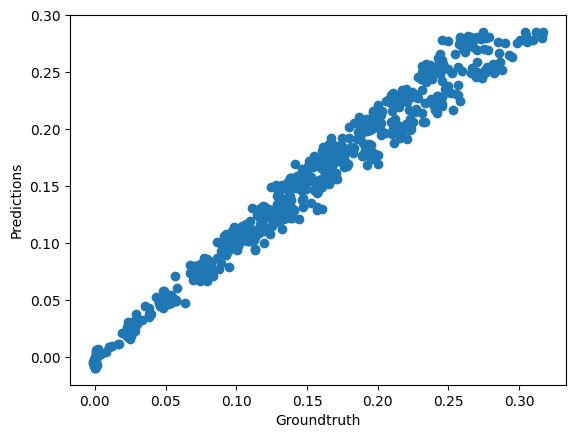

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [14]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

## Predict CoM -> y

### Linear Regression

In [15]:
# Input
X = np.hstack((X_com_sim[:, 0:1], # current reference velocity
               X_com_sim[:, 3:4], # actual velocity
               X_com_sim[:, 6:8], # FL position
               X_com_sim[:, 9:11], # FR position
               X_com_sim[:, 12:14], # RL position
               X_com_sim[:, 15:17])) # RR position

# Labels
Y = np.array([Y_com_sim[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split dataset and fit best model
X_test, Y_test, predictions, model_fr_com_y = find_best_model(X, Y, runs=5000)

R2:  -5.95721174027479
RMSE:  0.004819335951328441
The lowest error is:  4.784914797950309e-06
The highest error is:  0.020467429950731593
The avg. error is:  0.0029662096061736608


In [16]:
model_fr_com_y.coef_

array([[ 0.00120014,  0.00297546,  0.11956603,  0.11613013, -0.04487742,
         0.08731888,  0.03709329, -0.02229205, -0.15739845,  0.04791459]])

In [17]:
model_fr_com_y.intercept_

array([-0.04480356])

Text(0, 0.5, 'Predictions')

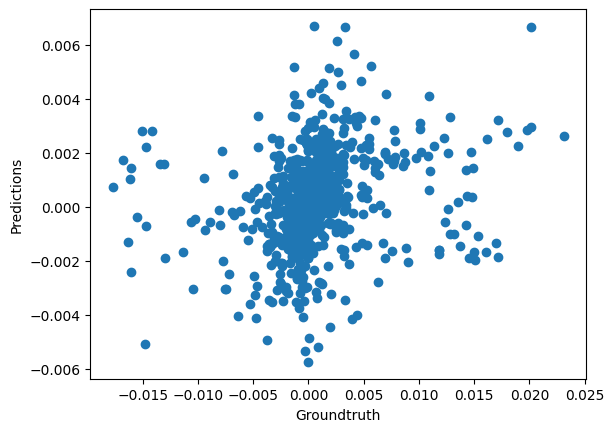

In [18]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')